In [1]:
from lensid.utils.ml_utils import *

# train XGB sky

In [2]:
df_dir='../../data/dataframes/train/'
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )[:2400]
df_unlensed_sky_half = pd.read_csv(df_dir+'unlensed_half_sky.csv' ,index_col=[0])
df_unlensed_sky_half = df_unlensed_sky_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_train_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half],ignore_index = True)
df_train_sky=df_train_sky.sample(frac = 1).reset_index(drop = True)

In [3]:
df_train_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq
128146,309,469,0,1.029720e-01,8.302512e-04,2.031258e-01,0.129003
128147,93,360,0,2.982768e-09,2.404971e-11,2.270257e-10,0.680843
128148,108,182,0,1.350318e+00,1.088745e-02,4.345510e-01,0.172899
128149,57,181,0,1.334476e-01,1.075973e-03,2.640919e-02,0.133120
128150,123,127,0,4.144193e-03,3.341414e-05,1.148487e-03,0.130986


In [4]:
xgboost_sky_model=train_xgboost_sky(df_train_sky)

In [5]:
joblib_file = "out/XGBsky_0.pkl"  
joblib.dump(xgboost_sky_model, joblib_file)

['out/XGBsky_0.pkl']

# validate XGB sky

In [6]:
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )[2400:]
df_unlensed_sky_half = pd.read_csv(df_dir+'unlensed_second_half_sky.csv' ,index_col=[0])
df_unlensed_sky_half = df_unlensed_sky_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_val_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half],ignore_index = True)
df_val_sky=df_val_sky.sample(frac = 1).reset_index(drop = True)

In [7]:
df_val_sky=XGB_predict(df_val_sky,xgboost_sky_model)

In [8]:
df_val_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,xgb_pred_bayestar_skymaps
126143,728,998,0,5.868588e-04,4.731774e-06,4.021449e-05,0.110254,0.000009
126144,587,737,0,1.787540e-01,1.441273e-03,2.442127e-02,0.127543,0.000007
126145,519,887,0,1.096238e+00,8.838841e-03,7.066263e-02,0.120107,0.000240
126146,584,823,0,7.902605e-09,6.371779e-11,1.237158e-09,0.280225,0.000001
126147,506,705,0,8.592895e-14,6.928351e-16,1.506586e-14,0.135865,0.000004


bayestar_skymaps_blu auc = 0.9651
bayestar_skymaps_d2 auc = 0.9651
bayestar_skymaps_d3 auc = 0.9012
bayestar_skymaps_lsq auc = 0.2307
xgb_pred_bayestar_skymaps auc = 0.9796


/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/strong_lensing_ml/ML_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


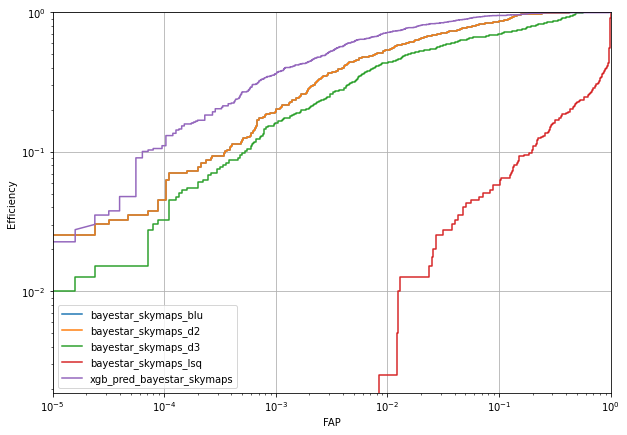

In [9]:
fig=plot_ROCs(df_val_sky,logy=True,cols=['bayestar_skymaps_blu','bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'xgb_pred_bayestar_skymaps'])

# cross-validate XGB sky

In [10]:
df_dir='../../data/dataframes/train/'
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )[:2400]
df_unlensed_sky_half = pd.read_csv(df_dir+'unlensed_half_sky.csv' ,index_col=[0])
#df_unlensed_sky_second_half = pd.read_csv(df_dir+'unlensed_second_half_sky.csv' ,index_col=[0])
#df_cv_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half,df_unlensed_sky_second_half],ignore_index = True)
df_cv_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half],ignore_index = True)

df_cv_sky=df_cv_sky.sample(frac = 1).reset_index(drop = True)

In [11]:
df_cv_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq
128146,402,404,0,7.794627e-01,6.284717e-03,7.551281e-02,0.129884
128147,12,236,0,1.774582e-05,1.430825e-07,1.971990e-06,0.104074
128148,56,449,0,1.336169e+00,1.077338e-02,3.303820e-01,0.138053
128149,291,374,0,4.924214e-08,3.970337e-10,1.768490e-08,0.104249
128150,71,171,0,1.558969e-02,1.256979e-04,1.734001e-03,0.114849


In [12]:
cv = StratifiedKFold(n_splits = 10)


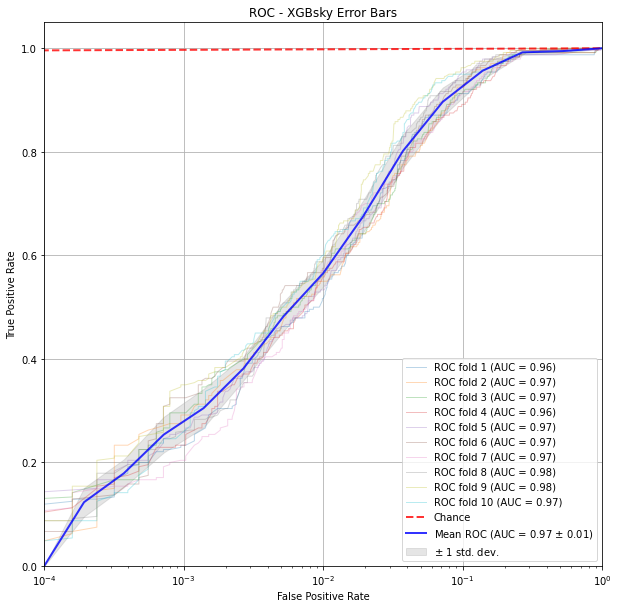

In [13]:
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-4,0,15)
fig,ax = plt.subplots()
cols=['bayestar_skymaps_blu','bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq']
for i,(train_index, test_index) in enumerate(cv.split(df_cv_sky,df_cv_sky.Lensing.values)):
    xgboost_sky_model=train_xgboost_sky(df_cv_sky.iloc[train_index])
    joblib_file = "out/XGBsky_"+str(i+1)+".pkl"  
    joblib.dump(xgboost_sky_model, joblib_file)
    X=np.c_[df_cv_sky.iloc[test_index][cols]]
    viz = plot_roc_curve(xgboost_sky_model,X,df_cv_sky.Lensing.values[test_index],name="ROC fold {}".format(i+1),alpha=0.3,lw=1,ax=ax)
    interp_tpr = np.interp(mean_fpr,viz.fpr,viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
        
ax.plot([0,1],[0,1],linestyle="--",lw = 2,color="r",label="Chance",alpha=0.8)
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b',label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.2,label=r'$\pm$ 1 std. dev.')
    
ax.set(xlim=[1e-4,1],ylim=[0,1.05],
          title = "ROC - XGBsky Error Bars",xscale='log')
ax.legend(loc ="lower right")
#plt.savefig('ROC-XGB_sky.png')
plt.grid()
plt.show()